![CC](https://i.creativecommons.org/l/by/4.0/88x31.png)

This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

# Linear algebra with PyTorch

This notebook introduces some frequently used linear Algebra and tensor operations in PyTorch. For a general introduction to important concepts of linear Algebra, refer to:

> [Introduction to linear Algebra](https://math.mit.edu/~gs/linearalgebra/) by Gilbert Strang

The first version of this notebook was created by **Mahdi Maktabi** during his time as student assisant at TU Braunschweig's [Institute of Fluid Mechanics](https://www.tu-braunschweig.de/ism).

In [1]:
# import PyTorch and plotting libraries
import torch as pt
import visualization as vis
import matplotlib.pyplot as plt
from math import sqrt

## PyTorch tensors

PyTorch provides a [tensor](https://pytorch.org/docs/stable/tensors.html) type to define $n$-dimensional arrays. Each element in a tensor must be of the same type. Working with PyTorch tensors has a very similar look and feel to working with Numpy arrays. flowTorch uses PyTorch tensors as data structure for field data.

### Creating tensors

In [2]:
# creating a vector of length 10 initialized with zeros
origin = pt.zeros(10)
origin

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
# the two most important tensor attributes: size and dtype
print("Dimension: ", origin.size())
print("Datatype: ", origin.dtype)

Dimension:  torch.Size([10])
Datatype:  torch.float32


In [4]:
# create a 2D tensor with 3 rows and two columns filled with ones
ones = pt.ones((3, 2))
ones

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [5]:
# 1D tensor with 5 linearly spaced values between zero and ten
x = pt.linspace(0, 10, 5)
x

tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])

In [6]:
# creating a tensor from a Python list
X_list = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11]
]
X = pt.tensor(X_list)
print("Created tensor of shape ", X.size())
X

Created tensor of shape  torch.Size([4, 3])


tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

### Accessing elements in a tensor

PyTorch tensors support element access via the typical square-bracket syntax. Also slicing is supported.

In [7]:
# accessing the element in the fourth row and thrid column
X[3, 2]

tensor(11)

In [8]:
# accessing the first column
X[:, 0]

tensor([0, 3, 6, 9])

In [9]:
# accessing the second row
X[1]

tensor([3, 4, 5])

In [10]:
# accessing the first two elements in the second column
X[:2, 1]

tensor([1, 4])

In [11]:
# accessing the last two column of the thrid row
X[2, -2:]

tensor([7, 8])

### Basic tensor operations

In [12]:
# elementwise addition of a scalar value
# X += 2 is shorthand for X = X + 2
X = pt.zeros((2, 3))
X += 2
X

tensor([[2., 2., 2.],
        [2., 2., 2.]])

In [13]:
# elementwise multiplication with a scalar value
Y = X * 2
Y

tensor([[4., 4., 4.],
        [4., 4., 4.]])

In [14]:
# elementwise subtraction of two tensors with the same shape
X - Y

tensor([[-2., -2., -2.],
        [-2., -2., -2.]])

In [15]:
# elementwise multiplication of two tensors with the same shape
X * Y

tensor([[8., 8., 8.],
        [8., 8., 8.]])

In [16]:
# subtracting a 1D tensor from each row
ones = pt.ones((1, Y.size()[1]))
print("Shape of 1D tensor: ", ones.size())
Y - ones

Shape of 1D tensor:  torch.Size([1, 3])


tensor([[3., 3., 3.],
        [3., 3., 3.]])

In [17]:
# subtracting a 1D tensor from each column
twos = pt.ones((Y.size()[0]), 1) * 2
print("Shape of 1D tensor: ", twos.size())
Y - twos

Shape of 1D tensor:  torch.Size([2, 1])


tensor([[2., 2., 2.],
        [2., 2., 2.]])

In [18]:
# transpose (swapping rows and columns in 2D)
print("Shape of Y/Y.T: ", Y.size(), "/", Y.T.size())
Y.T

Shape of Y/Y.T:  torch.Size([2, 3]) / torch.Size([3, 2])


tensor([[4., 4.],
        [4., 4.],
        [4., 4.]])

## Linear algebra with PyTorch
### Scalar product

The scalar or dot product between two vectors $\mathbf{a}$ and $\mathbf{b}$ of length $N$ is defined as:

$$
  \langle \mathbf{a}, \mathbf{b} \rangle := \sum\limits_{i=1}^{N} a_i b_i.
$$
The dot product has couple of useful properties; see section 1.2 in [Introduction to linear algebra](https://math.mit.edu/~gs/linearalgebra/).

The dot product of a vector with itself is equal to the squared length/magnitude
$\langle \mathbf{a}, \mathbf{a} \rangle = \left\|\mathbf{a}\right\|^2$

Example:

$\mathbf{a} = [1, 2, 2]^T$, $\langle \mathbf{a}, \mathbf{a} \rangle = 1^2 + 2^2 + 2^2 = 9$

In [19]:
a = pt.tensor([1.0, 2.0, 2.0])
len_a = pt.norm(a)

assert pt.dot(a, a) == len_a**2
pt.dot(a, a)

tensor(9.)

The cosine of the angle enclosed by two vectors of unit length is equal to their dot-product: 
$$
  {\displaystyle \varphi =\arccos{\frac {\langle \mathbf{a} ,{\mathbf {b}\rangle}}{\left\|{\mathbf {a}}\right\|\left\|{\mathbf {b}}\right\|}}}
$$

Example:

$\mathbf {a} = [1,1,1]^T,\ \mathbf {b} = [4,2,2]^T$

$\left\|{\mathbf {a}}\right\| = {\sqrt {{{1}^2}+{{1}^2}+{{1}^2}}} = 1.7321$,

$\left\|{\mathbf {b}}\right\| = {\sqrt {{{4}^2}+{{2}^2}+{{2}^2}}} = 4.8990$,

$\langle \mathbf{a}, \mathbf{b} \rangle = 1\cdot 4+1\cdot 2+1\cdot 2 = 8$

${\displaystyle \varphi =\arccos {\frac {8}{1.7321\cdot 4.8990}=0.3398}}$

In [20]:
a = pt.tensor([1.0, 1.0, 1.0])
b = pt.tensor([4.0, 2.0, 2.0])
c = pt.dot(a, b)/(pt.norm(a)*pt.norm(b)) 
angle = pt.acos(c) # angle in radians

assert pt.isclose(angle, pt.tensor(0.3398), atol=1.0E-3)
angle

tensor(0.3398)

To find a unit vector with the same direction as a given vector, we divide by the vector's magnitude:

$$ {\displaystyle \mathbf{u} = {\frac { \mathbf{a} }{\left\|{\mathbf {a}}\right\|}}}$$

Example:

$\mathbf{a} = [3,6,1]^T$, $\left\|{\mathbf{a}}\right\| = \sqrt {46}$

$\left\|{\mathbf {u}}\right\|$ = ${\sqrt {(\frac {3}{\sqrt {46}})^{2}+(\frac {6}{\sqrt {46} })^{2}+(\frac {1}{\sqrt {46} })^{2}}}=1$

In [21]:
# using the div-function is equivalent to elementwise division of a tensor by a scalar in this example
# e.g., b = a / pt.norm(a) yields the same result
a = pt.tensor([3.0, 6.0, 1.0])
b = pt.div(a, pt.norm(a))
a_length = pt.norm(b)

assert pt.isclose(a_length, pt.tensor(1.0), atol=1.0E-3)
a_length

tensor(1.0000)

Two vectors are orthogonal if their dot product is zero.

Example:

$\mathbf{a}=[3, 0]^T$, $\mathbf{b}=[0, 2]^T$

${\displaystyle \varphi =\arccos {\frac {{3\cdot 0 + 0\cdot 2}}{\sqrt {2}\cdot{\sqrt {3}}}=90^{\circ} }}$

In [22]:
a = pt.tensor([3.0, 0.0])
b = pt.tensor([0.0, 2.0])
c = pt.dot(a, b)/(pt.norm(a)*pt.norm(b)) 
d = pt.acos(c)
angle = pt.rad2deg(d)

assert pt.isclose(angle, pt.tensor(90.), atol=1.0E-4)
angle

tensor(90.)

### Cross product

The cross product between two three-dimensional vectors $\mathbf{a}$ and $\mathbf{b}$ is defined as:
$$
\mathbf{a}\times\mathbf{b} = \sum\limits_{i,j,k=1}^{3} a_i b_j \epsilon_{ijk} \mathbf{e}_k,
$$

where $\epsilon_{ijk}$ is the [Levi-Civita symbol](https://en.wikipedia.org/wiki/Levi-Civita_symbol), and $\mathbf{e}_k$ is the $k$-th unit vector.

Example:

$\mathbf{a}=[1, 2, 3]^T$, $\mathbf{b}=[3, 2, 1]^T$

${\mathbf{a}}\times{\mathbf{b}}=\begin{bmatrix}1 \\ 2 \\ 3 \end{bmatrix}\times\begin{bmatrix}3 \\ 2 \\ 1 \end{bmatrix}=\begin{bmatrix}2\cdot1 - 3\cdot2 \\3\cdot3 - 1\cdot1 \\1\cdot2 - 2\cdot3\end{bmatrix}\,=\begin{bmatrix}-4 \\ 8 \\ -4\end{bmatrix}$

In [23]:
a = pt.tensor([1.0, 2.0, 3.0])
b = pt.tensor([3.0, 2.0, 1.0])
c = pt.cross(a, b)

assert pt.equal(c, pt.tensor([-4., 8., -4.]))
c

tensor([-4.,  8., -4.])

The cross product may be used to compute the angle between two vectors:

$${\displaystyle \varphi =\arcsin {\frac {\left\| \mathbf{a} \times \mathbf {b}\right\|}{ \left\|{\mathbf {a}}\right\| \left\|{\mathbf {b}}\right\|}}}$$

Example:

$\mathbf {a} = [1,-2,3]^T,\mathbf{b} = [-4,5,6]^T$

$\left\|{\mathbf {a}}\right\|= {\sqrt {{{1}^2}+{{-2}^2}+{{3}^2}}} = \sqrt {14}$,
$\left\|{\mathbf {b}}\right\|= {\sqrt {{{-4}^2}+{{5}^2}+{{6}^2}}} = \sqrt {77}$

${\displaystyle \left\|\mathbf {a\times b}\right\| ={\begin{vmatrix}  \mathbf i& \mathbf j& \mathbf k \\1&-2&3\\-4&5&6\\\end{vmatrix}}}$
${\displaystyle {\begin{aligned} =(-27)\mathbf {i} -(18)\mathbf {j} +(-3)\mathbf {k}={\sqrt {{{(-27)}^2}+{{(-18)}^2}+{{(-3)}^2}}=3{\sqrt{118}}}\end{aligned}}}$

${ \varphi =\arccos {\frac {3\sqrt{118}}{\sqrt {14}\sqrt {77}}=83.0023^\circ}}$

In [24]:
a = pt.tensor([1.0, -2.0, 3.0])
b = pt.tensor([-4.0, 5.0, 6.0])
c = pt.norm(pt.cross(a, b))/(pt.norm(a)*pt.norm(b)) 
angle = pt.rad2deg(pt.asin(c))

assert pt.isclose(angle, pt.tensor(83.0023), atol=1.0E-4)
angle

tensor(83.0023)

The magnitude of the cross product yields the area of the parallelogram spanned by two vectors $\mathbf {a}$ and $\mathbf {b}$.

$$ A = {\displaystyle \left\|\mathbf {a} \times \mathbf {b} \right\|=\left\|\mathbf {a} \right\|\left\|\mathbf {b} \right\| \sin \varphi .}$$

Example:

$\mathbf {a} = [1,1,1]^T$, $\mathbf {b} = [1,1,2]^T$

$\mathbf{c}=\mathbf{a}\times\mathbf{b} = [1, -1, 0]^T$, $\left\|\mathbf{c}\right\|=\sqrt{2}$

In [25]:
a = pt.tensor([1.0, 1.0, 1.0])
b = pt.tensor([1.0, 1.0, 2.0])
c_mag = pt.norm(pt.cross(a, b))

assert pt.isclose(c_mag, pt.tensor(1.4142), atol=1.0E-4)
c_mag

tensor(1.4142)

### Outer product

The outer product of two vectors is a matrix. If the two vectors have dimensions $m$ and $n$, their outer product is an $m\times n$ matrix. Consider the vectors $\mathbf{a}=[a_{1},a_{2},\dots ,a_{m}]^T$ and $\mathbf{b} =[b_{1},b_{2},\dots ,b_{n}]^T$. Their outer product, denoted by $\mathbf{a}\otimes \mathbf{b}$, is obtained by multiplying each element of $\mathbf{a}$ with each element of $\mathbf{b}$ as follows:

$$
\mathbf{C} = \mathbf {a} \otimes \mathbf {b} ={\begin{bmatrix}a_{1}b_{1}&a_{1}b_{2}&\dots &a_{1}b_{n}\\a_{2}b_{1}&a_{2}b_{2}&\dots &a_{2}b_{n}\\\vdots &\vdots &\ddots &\vdots \\a_{m}b_{1}&a_{m}b_{2}&\dots &a_{m}b_{n}\end{bmatrix}}
$$
Example:

$\begin{bmatrix}0 \\ 1 \\ 2 \end{bmatrix}\begin{bmatrix}1&2&3 \end{bmatrix}=\begin{bmatrix}0&0&0\\1&2&3 \\2&4&6\end{bmatrix}$

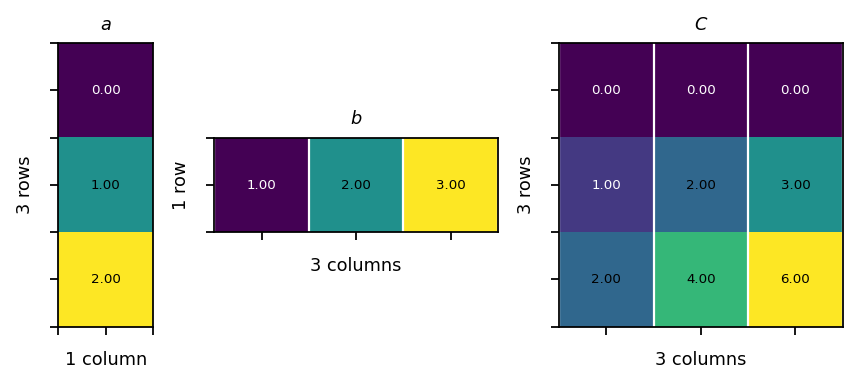

In [26]:
a = pt.tensor([[0, 1, 2]]).view(3, 1)
b = pt.tensor([1, 2, 3]).view(1, 3)
C = pt.mm(a, b)

assert pt.equal(C, pt.tensor([[0, 0, 0],[1, 2, 3],[2, 4, 6]]))
vis.plot_matrices_as_heatmap([a, b, C], [r"$a$", r"$b$", r"$C$"])

### Matrix multiplication

The product of two matrices $\mathbf{C} = \mathbf{AB}$ creates a new matrix with the same number of rows as $\mathbf{A}$ and the same number of columns as $\mathbf{B}$. The number of columns of matrix $\mathbf{A}$ must be equal to the number of row of matrix $\mathbf{B}$.

$$
{\begin{bmatrix}c_{11}&c_{12}&\cdots &c_{1p}\\c_{21}&c_{22}&\cdots &c_{2p}\\\vdots &\vdots &\ddots &\vdots \\c_{m1}&c_{m2}&\cdots &c_{mp}\\\end{bmatrix}}= {\begin{bmatrix}a_{11}&a_{12}&\cdots &a_{1n}\\a_{21}&a_{22}&\cdots &a_{2n}\\\vdots &\vdots &\ddots &\vdots \\a_{m1}&a_{m2}&\cdots &a_{mn}\\\end{bmatrix}}{\begin{bmatrix}b_{11}&b_{12}&\cdots &b_{1p}\\b_{21}&b_{22}&\cdots &b_{2p}\\\vdots &\vdots &\ddots &\vdots \\b_{n1}&b_{n2}&\cdots &b_{np}\\\end{bmatrix}}
$$
The coeffients of the resulting matrix are computed as follows:
$$
c_{ij}=a_{i1}b_{1j}+a_{i2}b_{2j}+\cdots +a_{ik}b_{kj}=\sum _{k=1}^{n}a_{ik}b_{kj}
$$

Example:

$$
{\mathbf{A}}{\mathbf{B}}=\begin{bmatrix}0&1&2 \\ 3&4&5 \\ 6&7&8 \end{bmatrix}\begin{bmatrix}0&1&2 \\ 3&4&5 \\ 6&7&8 \end{bmatrix}=\begin{bmatrix}15&18&21\\42&54&66 \\69&90&111 \end{bmatrix}
$$

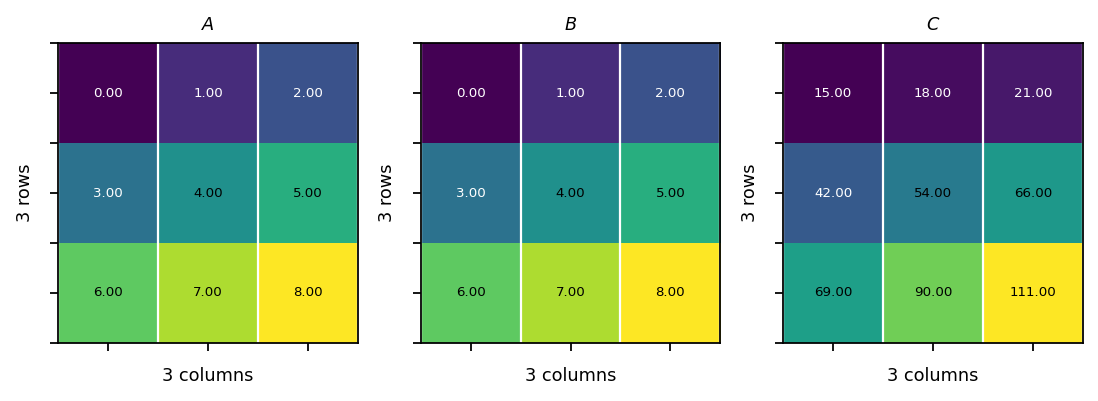

In [27]:
A = pt.tensor(
    [[0, 1, 2],
     [3, 4, 5],
     [6, 7, 8]]
)
B = pt.tensor(
    [[0, 1, 2],
     [3, 4, 5],
     [6, 7, 8]]
)
C = pt.mm(A, B)

assert pt.equal(C, pt.tensor([[15, 18, 21],[42, 54, 66],[69, 90, 111]]))
vis.plot_matrices_as_heatmap([A, B, C], [r"$A$", r"$B$", r"$C$"])

Example 2:

${\mathbf{A}}{\mathbf{B}}=\begin{bmatrix}0&1&2 \\ 3&4&5 \\ 6&7&8 \end{bmatrix}\begin{bmatrix}0 \\ 3 \\ 6 \end{bmatrix}=\begin{bmatrix}15\\14\\23 \end{bmatrix}$

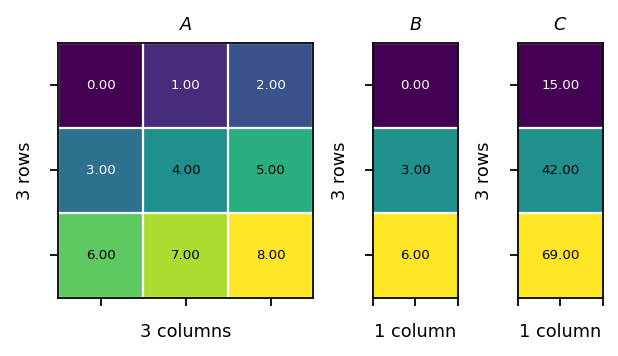

In [28]:
A = pt.tensor(
    [[0., 1., 2.],
     [3., 4., 5.],
     [6., 7., 8.]]
)
B = pt.tensor([[0., 3., 6.]]).view(3, 1)
C = pt.mm(A, B)

# instead of the mm function we can also use the @ opertaor
assert pt.equal(C, A @ B)
assert pt.equal(C, pt.tensor([15., 42., 69.]).view(3, 1))
vis.plot_matrices_as_heatmap([A, B, C], [r"$A$", r"$B$", r"$C$"])

### Identity matrix

The identity matrix is a square matrix with a value of one on the diagonal and zero elsewhere.

$$
I={\begin{bmatrix}1&0&0&\cdots &0\\0&1&0&\cdots &0\\0&0&1&\cdots &0\\\vdots &\vdots &\vdots &\ddots &\vdots \\0&0&0&\cdots &1\end{bmatrix}}
$$

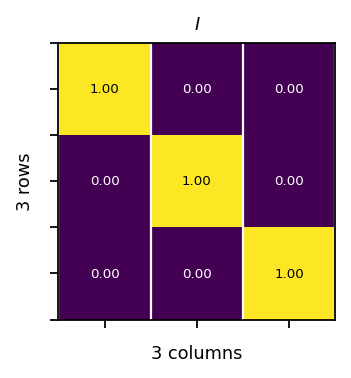

In [29]:
ones = pt.ones(3)
identity = pt.diag(ones)

assert pt.allclose(pt.eye(3), identity)
vis.plot_matrices_as_heatmap([identity], [r"$I$"])

### Transpose of a matrix

The transpose of a matrix is obtained by swaping its rows and columns.

$$
\mathbf{A}=
\begin{bmatrix}
a_{11} & \dots & a_{1n} \\
\vdots &       & \vdots \\
a_{m1} & \dots & a_{mn}
\end{bmatrix},\quad
\mathbf{A}^T=
\begin{bmatrix}
a_{11} & \dots & a_{m1} \\
\vdots &       & \vdots \\
a_{1n} & \dots & a_{mn}
\end{bmatrix}
$$

Example:

$\begin{bmatrix}1&3&5\\2&4&6\end{bmatrix}^T=\begin{bmatrix}1&2\\3&4\\5&6\end{bmatrix}$

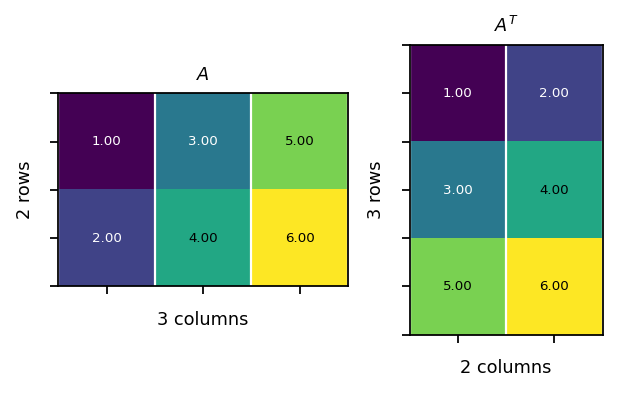

In [30]:
A = pt.tensor(
    [[1, 3, 5],
     [2, 4, 6]]
)
AT = pt.tensor(
    [[1, 2],
     [3, 4],
     [5, 6]]
)

assert (A.T - AT).sum().item() == 0
vis.plot_matrices_as_heatmap([A, A.T], [r"$A$", r"$A^T$"])

### Symmetric matrix

A symmetric matrix is a square matrix that is equal to its transpose: $\mathbf{A} = \mathbf{A}^T$. The matrix coefficients are symmetric with respect to the diagonal.

Example:

${\begin{bmatrix}1&2&6\\2&3&4\\6&4&5\end{bmatrix}}$

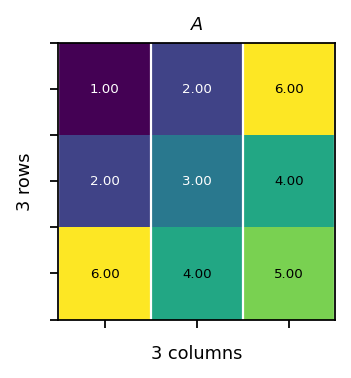

In [31]:
A = pt.tensor(
    [[1, 2, 6],
     [2, 3, 4],
     [6, 4, 5]]
)
AT = pt.transpose(A, 0, 1)

assert pt.equal(A, AT)
vis.plot_matrices_as_heatmap([A], [r"$A$"])

### Orthogonal matrix

A matrix is orthogonal if its column vectors form an orthogonal basis. The column vectors are orthogonal if:

$$
\langle\mathbf{q}_i, \mathbf{q}_j\rangle=
\begin{cases}
  0 & \text{if} ~i\neq j \\
  \neq 0 & \text{if}~i=j
\end{cases}
$$

Example:

${\mathbf{Q}}{\mathbf{Q^{T}}}=\begin{bmatrix}1&-2&2 \\ 2&-1&-2 \\ 2&2&1 \end{bmatrix}\begin{bmatrix} 1&2&2 \\ -2&-1&2 \\ 2&-2&1 \end{bmatrix}=\begin{bmatrix}9&0&0\\0&9&0 \\0&0&9 \end{bmatrix}$

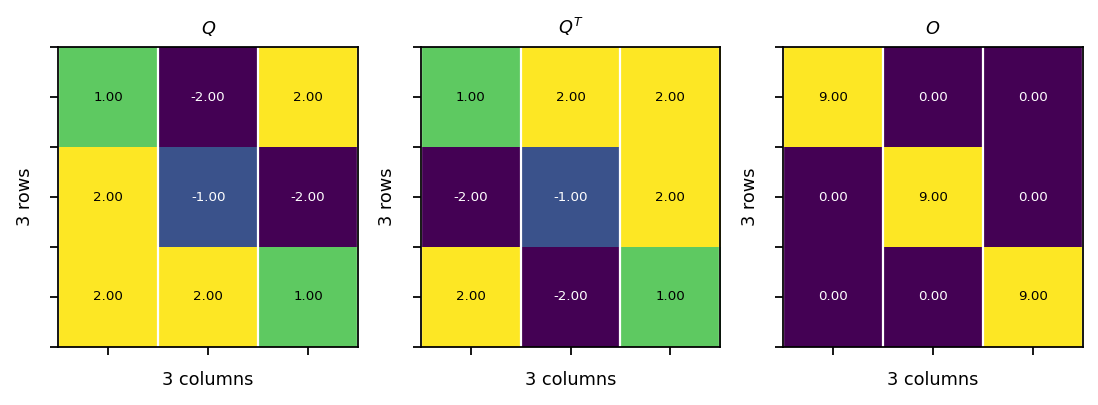

In [32]:
Q = pt.tensor(
    [[1.0, -2.0,  2.0],
     [2.0, -1.0, -2.0],
     [2.0,  2.0,  1.0]]
)
QT = pt.transpose(Q, 0, 1)
O = pt.mm(Q, QT)

assert pt.allclose(pt.eye(3)*9, O)
vis.plot_matrices_as_heatmap([Q, QT, O], [r"$Q$", r"$Q^T$", r"$O$"])

### Orthonormal matrix

The vectors $\mathbf{q}_i$ are orthonormal if:

$$
\langle\mathbf{q}_i, \mathbf{q}_j\rangle={\begin{cases}0&{\text{if}}~i\neq j\quad\text{(orthogonal vectors)} \\1&{\text{if}~i=j\quad\text{(unit vectors: $|\mathbf{q}_i|$ = 1)}}\end{cases}}
$$

A matrix $\mathbf{Q}$ with orthonormal column vectors satisfies the relation $\mathbf{Q}^T\mathbf{Q} = \mathbf{Q}\mathbf{Q}^T = \mathbf{I}$.

Example:

${\mathbf{Q}^T}{\mathbf{Q}}=\begin{bmatrix}{\frac {1}{\sqrt{2}}}&{\frac {1}{\sqrt{6}}}&{\frac {1}{\sqrt{3}}}\\{\frac {-1}{\sqrt{2}}}&{\frac {1}{\sqrt{6}}}&{\frac {1}{\sqrt{3}}}\\0&{\frac {-2}{\sqrt{6}}}&{\frac {1}{\sqrt{3}}}\end{bmatrix}\begin{bmatrix}{\frac {1}{\sqrt{2}}}&{\frac {-1}{\sqrt{2}}}&0\\{\frac {1}{\sqrt{6}}}&{\frac {1}{\sqrt{6}}}&{\frac {-2}{\sqrt{6}}}\\{\frac {1}{\sqrt{3}}}&{\frac {1}{\sqrt{3}}}&{\frac {1}{\sqrt{3}}}\end{bmatrix}=\begin{bmatrix}1&0&0\\0&1&0 \\0&0&1 \end{bmatrix}$

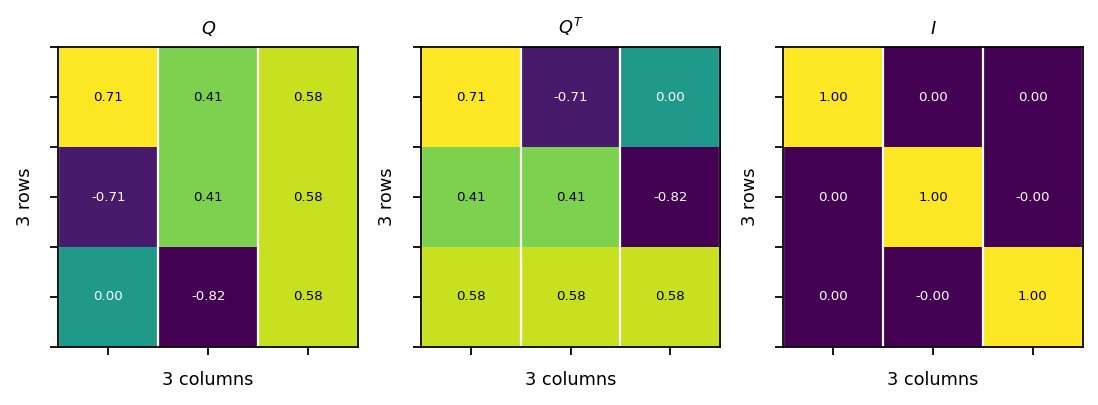

In [33]:
Q = pt.tensor(
    [[1./sqrt(2), 1./sqrt(6), 1./sqrt(3)],
     [-1./sqrt(2), 1./sqrt(6), 1./sqrt(3)],
     [0./sqrt(2), -2./sqrt(6), 1./sqrt(3)]]
)
QT = pt.transpose(Q, 0, 1)
I = pt.mm(QT, Q)

assert pt.allclose(pt.eye(3), I, atol=1.0E-6)
assert pt.allclose(pt.mm(Q, QT), pt.mm(QT, Q), atol=1.0E-6)
vis.plot_matrices_as_heatmap([Q, QT, I], [r"$Q$", r"$Q^T$", r"$I$"])

### Hermitian matrix

A Hermitian matrix is a complex matrix that is equal to its conjugate transpose:

$$ \mathbf{A}=\overline{\mathbf{A}}^T $$

Example:

${\mathbf{A} = \begin{bmatrix}1&3-{\mathrm  {j}}&4\\3+{\mathrm  {j}}&-2&-6+{\mathrm  {j}}\\4&-6-{\mathrm  {j}}&5\end{bmatrix},} \quad {\overline{\mathbf{A}} = \begin{bmatrix}1&3+{\mathrm  {j}}&4\\3-{\mathrm  {j}}&-2&-6-{\mathrm  {j}}\\4&-6+{\mathrm  {j}}&5\end{bmatrix}}$

${\mathbf{A}=\overline{\mathbf{A}}^T= \begin{bmatrix}1&3-{\mathrm  {j}}&4\\3+{\mathrm  {j}}&-2&-6+{\mathrm  {j}}\\4&-6-{\mathrm  {j}}&5\end{bmatrix}}$

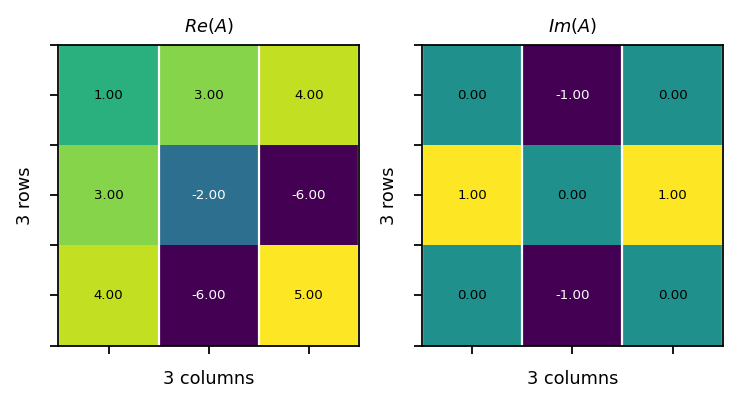

In [34]:
A = pt.tensor(
    [[1., 3.-1j , 4.],
     [3.+1j, -2., -6.+1j],
     [4., -6.-1j, 5.]]
)
AH = A.conj().T

assert pt.allclose(A, AH)
vis.plot_matrices_as_heatmap([A.real, A.imag], [r"$Re(A)$", r"$Im(A)$"])

### Unitary matrix

A unitary matrix is a complex square matrix whose column vectors form an orthonormal basis. The matrix product of a unitary matrix with its conjugate transpose, denoted by $\dagger$, yields the identity matrix:

$$ \mathbf{Q}\mathbf{Q}^\dagger = \mathbf{I} $$

Example:

${\mathbf{Q}={\frac {1}{2}}\begin{bmatrix}1+i&1-i\\1-i&1+i\end{bmatrix}},\quad
{\mathbf{Q}\mathbf{Q}^\dagger={\frac {1}{4}}\begin{bmatrix}1+i&1-i\\1-i&1+i\end{bmatrix}}{\begin{bmatrix}1-i&1+i\\1+i&1-i\end{bmatrix}}=\begin{bmatrix}1&0\\0&1 \end{bmatrix}= \mathbf{I}$

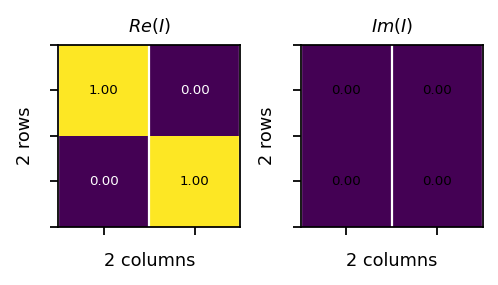

In [35]:
Q = pt.tensor(
    [[(1+1j)/2.0, (1-1j)/2.0],
     [(1-1j)/2.0, (1+1j)/2.0]]
)
QH = pt.conj(Q).T
I = pt.mm(Q, QH)

assert pt.allclose(I, pt.eye(2, dtype=pt.cfloat))
assert pt.allclose(I, pt.mm(QH, Q))
vis.plot_matrices_as_heatmap([I.real, I.imag], [r"$Re(I)$", r"$Im(I)$"])

## Matrix decompositions

### Eigen-decomposition

The eigen-decomposition of a square matrix $\mathbf{A}$ is:

$$ \mathbf{A}=\mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{-1} $$

$\mathbf{Q}$ is a square matrix formed by the eigenvecctors of $\mathbf{A}$, and $\mathbf{\Lambda}$ is a diagonal matrix whose diagonal elements are the corresponding eigenvalues.

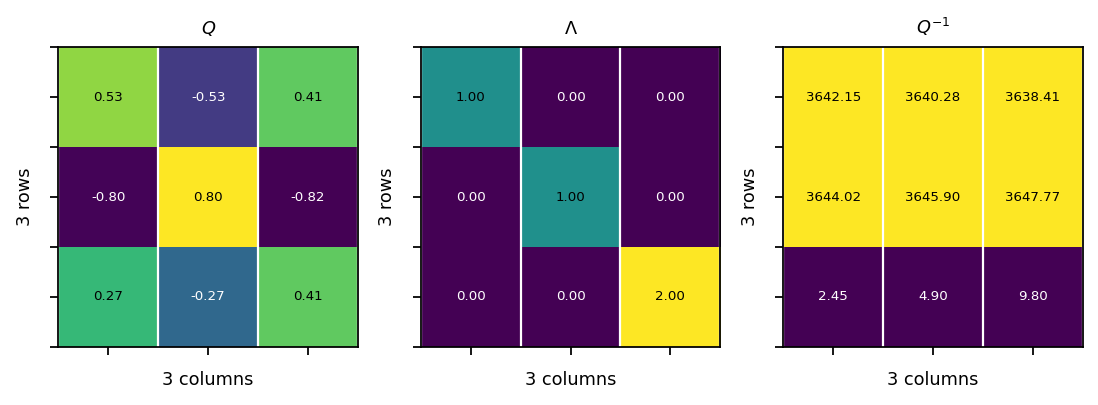

In [36]:
A = pt.tensor(
    [[0.0, 0.0,  2.0],
     [1.0, 0.0, -5.0],
     [0.0, 1.0,  4.0]]
)

# the eigen decomposition returns complex tensors; to compare them with
# the original tensor, we remove the imaginary part
val, vec = pt.linalg.eig(A)
Q = vec.real
L = pt.diag(val).real
invQ = pt.linalg.inv(Q)

assert pt.allclose(pt.mm(Q, invQ), pt.eye(3), atol=1.0E-3)
assert pt.allclose(A, pt.mm(Q, L).mm(invQ), atol=1.0E-2)
vis.plot_matrices_as_heatmap([Q, L, invQ], [r"$Q$", r"$\Lambda$", r"$Q^{-1}$"])

### Singular value decomposition (SVD)

The SVD is a factorization of a real or complex matrix that generalizes the eigen-decomposition of a square matrix to any ${ m\times n}$ matrix:

$$\mathbf{A} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^\dagger$$

- $\mathbf{U}$: is a $m \times m$ unitary matrix; the columns of $\mathbf{U}$ are called left singular vectors
- $\mathbf{\Sigma}$ is a $m\times n$ matrix containing a diagonal matrix of dimension $\mathrm{min}(m, n)$; the diagonal elements are called singular values
- $\mathbf{V}^\dagger$ is a $n\times n$ unitary matrix; the columns of $\mathbf{V}^\dagger$ are called right singular vectors

example:

$\mathbf{A}$=$\begin{bmatrix}1&2 \\ 3&4 \\ 5&6 \end{bmatrix}$=$\begin{bmatrix}-0.23&0.88&0.41\\-0.52&0.24&-0.82\\-0.82&-0.4&0.41 \end{bmatrix}\begin{bmatrix}9.53&0\\0&0.51\\0&0 \end{bmatrix}\begin{bmatrix}-0.62&-0.78\\-0.78&0.62 \end{bmatrix}$

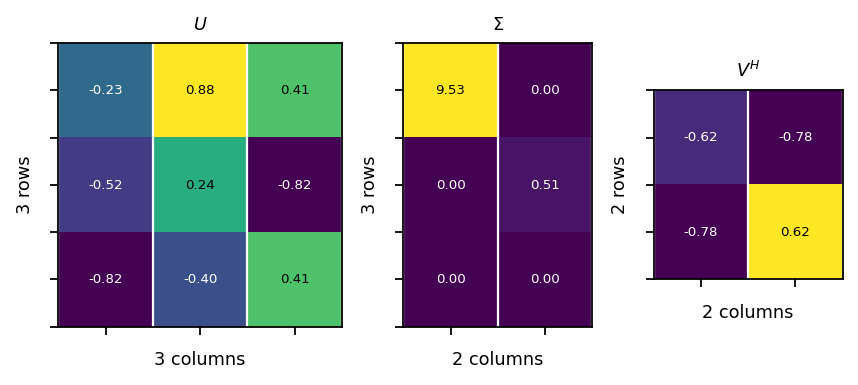

In [37]:
A = pt.tensor(
    [[1.0, 2.0],
     [3.0, 4.0],
     [5.0, 6.0]]
)
U, s, VH = pt.svd(A, some=False, compute_uv=True)
S = pt.zeros_like(A)
S[:A.shape[1], :] = pt.diag(s)

assert pt.allclose(U.mm(U.conj().T), pt.eye(3), atol=1.0e-6)
assert pt.allclose(VH.mm(VH.conj().T), pt.eye(2), atol=1.0e-6)
assert pt.allclose(A, U.mm(S.mm(VH)))
vis.plot_matrices_as_heatmap([U, S, VH], [r"$U$", r"$\Sigma$", r"$V^H$"])